# C9M3 Notebook 6: Comparing Random Forest and XGBoost modeling performance

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import time

In [2]:
#load data
data = fetch_california_housing()
x,  y = data.data, data.target

#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size  = 0.2, random_state = 4)

In [3]:
"""
Exercise 1: How many observations and features does the dataset have?
"""
x.shape

(20640, 8)

thus there are  8 features and 20640 observations

---

### Initialize models
In this step you define the number of base estimators, or individual trees, to be used in each model, and then intialize models for Random Forest regression and XGBoost regression.  You'll just use the default parameters to make the performance comparisons. As a part of the performance comparison, we'll also measure the training times for both models.


In [4]:
#initialize model 
n_estimators = 100
rf = RandomForestRegressor(n_estimators= n_estimators, random_state= 42)
xgb = XGBRegressor(n_estimators = n_estimators, random_state = 42)

In [5]:
# fit models
# Measure training time for Random Forest
start_time_rf = time.time()
rf.fit(x_train, y_train)
end_time_rf = time.time()
rf_train_time = end_time_rf - start_time_rf

# Measure training time for XGBoost
start_time_xgb = time.time()
xgb.fit(x_train, y_train)
end_time_xgb = time.time()
xgb_train_time = end_time_xgb - start_time_xgb

In [6]:
print(f"time to train Random Forest: {rf_train_time}")
print(f"time to train XGBoost: {xgb_train_time}")

time to train Random Forest: 24.472658157348633
time to train XGBoost: 0.36292028427124023


In [7]:
"""
Exercise 2. Use the fitted models to make predictions on the test set.
"""
# Measure testing time for Random Forest
start_time_rf = time.time()
y_rf_hat = rf.predict(x_test)
end_time_rf = time.time()
rf_test_time = end_time_rf - start_time_rf

# Measure testing time for XGBoost
start_time_xgb = time.time()
y_xgb_hat = xgb.predict(x_test)
end_time_xgb = time.time()
xgb_test_time = end_time_xgb - start_time_xgb

#Testing Time
print(f"time to test Random Forest: {rf_test_time}")
print(f"time to test XGBoost: {xgb_test_time}")

time to test Random Forest: 0.21242332458496094
time to test XGBoost: 0.002172231674194336


In [8]:
"""
Exercise 3:  Calulate the MSE and R^2 values for both models
"""
mse_rf = mean_squared_error(y_test, y_rf_hat)
mse_xgb = mean_squared_error(y_test, y_xgb_hat)

r2_rf = r2_score(y_test, y_rf_hat)
r2_xgb = r2_score(y_test, y_xgb_hat)


"""
Exercise 4:  Print the MSE and R^2 values for both models
"""
print(f"Random Forest  |  MSE = {mse_rf}  |  R^2 = {r2_rf}")
print(f"XGBoost  |  MSE = {mse_xgb}  |  R^2 = {r2_xgb}")

Random Forest  |  MSE = 0.25477241458498484  |  R^2 = 0.804145461226924
XGBoost  |  MSE = 0.21938758394846983  |  R^2 = 0.8313473060387622


In [9]:
"""
Exercise 5:  Print the timings for each model
"""
print(f'Random Forest:  Training Time = {rf_train_time:.3f} seconds, Testing time = {rf_test_time:.3f} seconds')
print(f'      XGBoost:  Training Time = {xgb_train_time:.3f} seconds, Testing time = {xgb_test_time:.3f} seconds')

Random Forest:  Training Time = 24.473 seconds, Testing time = 0.212 seconds
      XGBoost:  Training Time = 0.363 seconds, Testing time = 0.002 seconds


In [10]:
"""
Exercise 6. Calculate the standard deviation of the test data
"""
std_y = np.std(y_test)
std_y

1.140537006835962

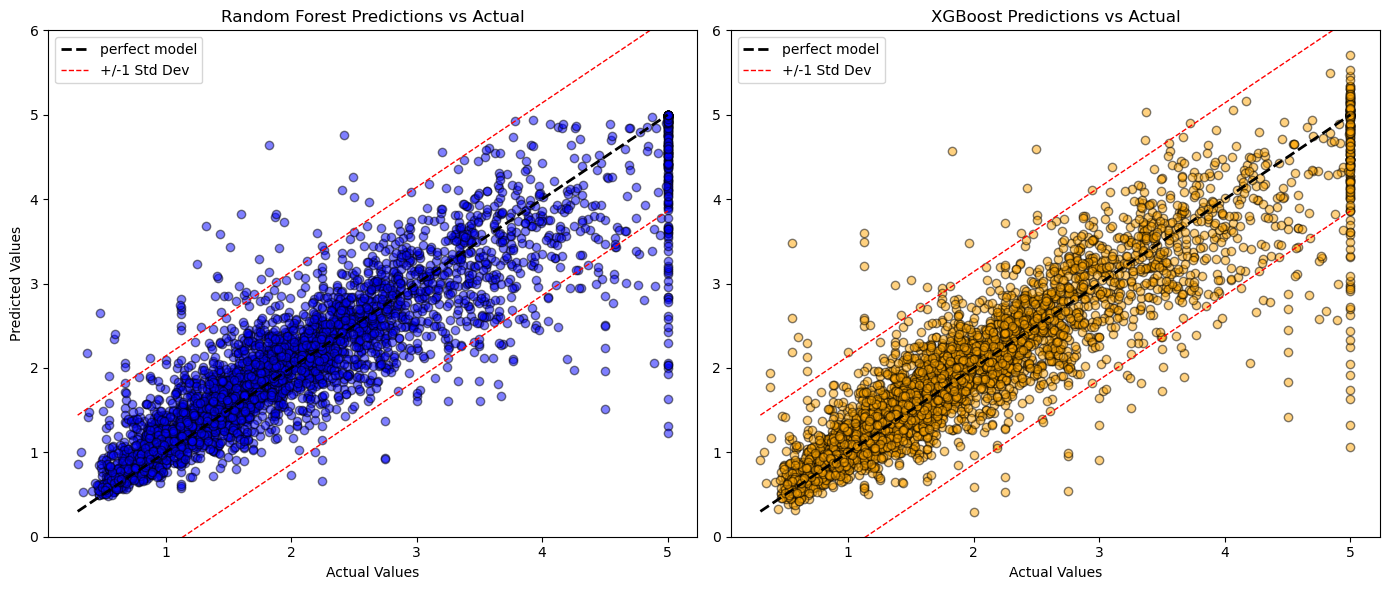

In [11]:
#Visualize the results

plt.figure(figsize=(14, 6))

# Random Forest plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_rf_hat, alpha=0.5, color="blue",ec='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,label="perfect model")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', lw=1, label="+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--', lw=1, )
plt.ylim(0,6)
plt.title("Random Forest Predictions vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()


# XGBoost plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_xgb_hat, alpha=0.5, color="orange",ec='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,label="perfect model")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', lw=1, label="+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--', lw=1, )
plt.ylim(0,6)
plt.title("XGBoost Predictions vs Actual")
plt.xlabel("Actual Values")
plt.legend()
plt.tight_layout()
plt.show()

---
Thank You!!!